# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
from scipy import stats
from statsmodels.stats.weightstats import ztest

df = pd.read_csv('data/human_body_temperature.csv')

## Is the distribution of body temperatures normal?

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [13]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


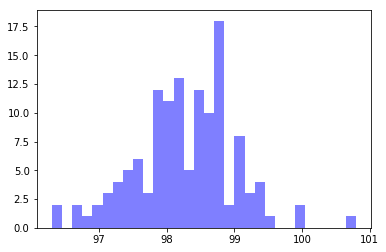

In [18]:
num_bins = 30
n, bins, patches = plt.hist(df.temperature, num_bins, facecolor='blue', alpha=0.5)
plt.show()

Answer #1 Yes, as seen above in the plot the distribution of the body temperature is normal.

## Is the sample size large? Are the observations independent?


In [19]:
df.shape

(130, 3)

Sample data is more than 30 and is independent so sample size is large enough. And the observations are independent.

## Is the true population mean really 98.6 degrees F?

In [29]:
## Bootstrap hypothesis test:
Lets say,
Null Hypothesis is Population mean is 98.6 degree F
Alternative hypothesis is Population mean is not 98.6 degree F

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

# Make an array of translated temperature
translated_temperature = df.temperature - np.mean(df.temperature) + 98.6

# Take bootstrap replicates of translated temperature: temp_replicates
temp_replicates =  draw_bs_reps(translated_temperature, np.mean, 500)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(temp_replicates <= np.mean(df.temperature)) / 500

# Print the p-value
print('p = ', p)

p =  0.0


#### As p value is 0, this null hypothesis is rejected. So population mean is not 98.6 degree F.

## t test or z test?

As the sample size is more than 30 and population variance is also known, z test is more appropriate

In [43]:
#Lets do the t test
mu = 98.6
tstat, t_pval = stats.ttest_1samp(a=df['temperature'], popmean=mu)
print('The T-Statistic is %d with a p-value of %s' %(abs(tstat),t_pval))

The T-Statistic is 5 with a p-value of 2.4106320415561276e-07


In [40]:
# Z test
z_score, z_pval = ztest(df['temperature'],value=98.6)
print('The Z-Statistic is %d with a p-value of %s' %(abs(z_score),z_pval))

The Z-Statistic is 5 with a p-value of 4.9021570141012155e-08


## Draw a small sample of size 10 from the data and repeat both frequentist tests. 
- Which one is the correct one to use? 
- What do you notice? What does this tell you about the difference in application of the t and z statistic? 

In [54]:
# Sample the data 
sample_data = np.random.choice(df['temperature'], size=10)

#t test
tstat, t_pval = stats.ttest_1samp(a=sample_data, popmean=mu)
print('The T-Statistic is %d with a p-value of %s for sample data of 10' %(abs(tstat),t_pval))

# z test
z_score, z_pval = ztest(sample_data,value=98.6)
print('The Z-Statistic is %d with a p-value of %s sample data of 10' %(abs(z_score),z_pval))

The T-Statistic is 1 with a p-value of 0.20403895804949237 for sample data of 10
The Z-Statistic is 1 with a p-value of 0.17084161587159608 sample data of 10


- The correct one to use in this case where the sample is of size = 10 , t test is appropriate one.
- As the p value is less than 0.5 in both the test we can reject the null hypothesis that Population mean is 98.6 degree F.

## At what temperature should we consider someone's temperature to be "abnormal"? 
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach. 
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.At what temperature should we consider someone's temperature to be "abnormal"? 

In [90]:
# Margin Error

# Lets first calculate standard deviation

std_temp = np.std(df.temperature)
n = len(df.temperature)

#standard error
std_error = std_temp / np.sqrt(n)
print('The standard error/margin of error is %s' %std_error)

#Confidence interval
confidence = 0.95
m = np.mean(df.temperature)
h = std_error * stats.t.ppf((1 + confidence) / 2, n - 1)

start = m - h
end = m + h

print('At the 95% level, the lower bound of our confidence interval is ',start, 
      ' and the upper bound is ',end)

The standard error/margin of error is 0.06405661469519336
At the 95% level, the lower bound of our confidence interval is  98.12249318821641  and the upper bound is  98.37596835024515


Given our confidence interval, we would consider someone's body temperature lower than 98.12 or higher than 98.37 to be considered abnormal. That is, we expect only 5% of the population to have abnormal body temperature.

## Is there a significant difference between males and females in normal temperature?
- What testing approach did you use and why? 
- Write a story with your conclusion in the context of the original problem.

In [106]:
male_temp = df[df.gender == 'M']
female_temp  = df[df.gender == 'F']
print('Mean of male temperature is: ', np.mean(male_temp.temperature))
print('Mean of female temperature is: ', np.mean(female_temp.temperature))

Mean of male temperature is:  98.1046153846154
Mean of female temperature is:  98.39384615384613


In [109]:
gender_ttest, gender_pval = stats.ttest_ind(a=male_temp.temperature, b=female_temp.temperature, equal_var=False)
print('The T-Statistic is %d with a p-value of %s' %(abs(gender_ttest), gender_pval))

The T-Statistic is 2 with a p-value of 0.023938264182934196


- Testing approach used to compare female and male mean is t test.
- Conclusion:
  Null hypothesis is Female body temperature = Male body temperature
  Alternative hypothesis  is  Female body temperature != Male body temperature
  
  As we can see above the p value is less than 0.5 so the null hypothesis is rejected. 
  So alternative hypothesis that Male and Female body temperature is not equal is true.
  This indicates that if we consider this fact of temperature differences based on gender, normal body will be different for male and female. 